# Domácí úkol č. 2 - 🕸 Síťová analýza PID

## 📚 Data
Jako dataset nám poslouží [otevřená data Pražské integrované dopravy](https://pid.cz/o-systemu/opendata/). Konkrétně budeme pracovat s daty [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs), která jsou původně ve formátu GTFS (General Transit Feed Specification). To je formát, který využívá široká škála softwarových aplikací a kvůli tomu jej při publikaci dat využívají také veřejné dopravní agentury včetně PID.

☝️**Pozor!** Pro řešení domácí úlohy vám poskytneme už připravený dataset $D$ ve formátu `csv`. Dataset $D$ jsme pro vás sestavili z dat, která pocházejí z [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs). Více informací o všech souborech a jejich atributech lze nalézt v [dokumentaci formátu GTFS](https://developers.google.com/transit/gtfs/reference).

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 4 body. Úkol řešíte jako **jednotlivci**.

**✨ Dataset**
* Načtěte si data ze souboru `d.csv`, což je již zmíněný dataset $D$, který obsahuje záznam pro každé dvě **po sobě jdoucí** zastávky nějakého spoje.
* Struktura je následující (pro zjednodušení neuvažujeme service start_date a end_date):

| stop_from | stop_from_name | stop_to | stop_to_name | depart_from | arrive_to | route_type | is_night | mon | tue | wed | thu | fri | sat | sun |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| U699Z3P | Stadion Strahov | U981Z1P | Koleje Strahov | 7:24:00 | 7:25:00 | 3 | 0 | 1 | 1 | 1 | 1 | 1 | 0 | 0 |

* Jedinečným identifikátorem zastávky je **název zastávky**. Pozor na stejné názvy zastávek pro různé dopravní prostředky - u takových zastávek uvažujte, že se jedná o jednu a tutéž stanici.

**⚙️ Předzpracování dat**

* Atributy `depart_from` a `arrive_to` budete chtít nejspíše upravit. Obsahují totiž časové údaje delší než 24 hodin (celkem se jedná o 1.5 % záznamů). Z reference formátu GTFS (info o sloupci, z kterého vznikl `depart_from` a `arive_to`): _Arrival time at a specific stop for a specific trip on a route. … For times occurring after midnight on the service day, enter the time as a value greater than 24:00:00 in HH:MM:SS local time for the day on which the trip schedule begins._ Nicméně narazíte i na chybné časy, které začínají s hodnotou větší než 24. Všechny tyto případy můžete vyřešit pomocí **modulo 24** ☝️.


**🕸️ Základní síťová analýza** (celkem 12 bodů)

Úkolem je analyzovat síť zastávek PID. Zastávky tedy budou uzly sítě. Mezi dvěma zastávkami je orientovaná hrana, pokud jsou to dvě po sobě jdoucí zastávky nějakého spoje (existuje alespoň jeden záznam v datasetu $D$ s odpovídajícími `stop_from`, `stop_to`). Váha hrany je rovna počtu dopravních prostředků, které na dané trase za období jednoho týdne projedou.

Postupujte následovně:
* Začněte volbou libovolného balíčku pro analýzu a vizualizaci sítí (lze využít i zmíněný NetworkX),
* z datasetu $D$ vytvořte reprezentaci dat, která je vhodná pro vámi zvolený vizualizační balíček,
* vytvořte vizualizaci sítě (celkem za 4 body) - vizualizace musí být čitelná, proto můžete vizualizovat i podčást sítě (např. pro určitý dopravní prostředek, např. tramvaje (kromě vizualizace sítě lanovky nebo metra, tu neuznáváme) nebo nějaký podgraf - řešení ponecháme na vás),
* pomocí alespoň tří měr centrality analyzujte důležitost zastávek za období jednoho týdne (pondělí - neděle) a komentujte slovně, co tyto míry vzhledem ke konkrétním datům znamenají (každá míra za 2 body, celkem tedy za 6 bodů),
* vytvořte vizualizaci pro alespoň jednu míru centrality (celkem za 2 body).

**❓ Vlastní otázky** (3 body za každou otázku, celkem max. 9 bodů)

Vytvořte 3 otázky (můžete i více), založené na filtraci datasetu $D$ a odpovídejte na ně vhodnými vizualizacemi. Otázky pro inspiraci:
* Mění se důležité zastávky v závislosti na denním/nočním provozu?
* Je rozdíl ve vytíženosti zastávek během pracovního týdne/víkendu?
* ...

**🔥 Data navíc**

V souboru `stops.txt` je u každé zastávky uvedena **zeměpisná šířka a délka**. Tato data můžete využít pro rozšíření své analýzy a také vám mohou pomoci při layoutování grafu. ☝️ Pozor na stejné názvy zastávek s trochu jinou lokací pro různé dopravní prostředky. Je třeba navrhnout nějaké řešení (např. první, průměr, těžiště mnohoúhelníku apod., libovolně dle vašeho úsudku) a to zdůvodnit.

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 4 body za průběžné komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za vizualizaci sítě,
- 6 bodů za komentovanou analýzu alespoň 3 měr centrality,
- 2 body za vizualizaci jedné z měr centrality,
- 9 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 2 získat maximálně 25 bodů.

### Import potřebných balíčků

In [1]:
import pandas as pd # Práce s dataframe
import numpy as np # Vědecké výpočty
import matplotlib.pyplot as plt # Vizualizace
import matplotlib.gridspec as gridspec # Mřížka grafů
import matplotlib.ticker as ticker # Mřížka grafů
import seaborn as sns # Vizualizace
import scipy as sp # Statistika
import networkx as nx

import math

%matplotlib inline

### Načtení dat

In [2]:
df = pd.read_csv("d.csv")
locations = pd.read_csv("stops.txt")

# Předzpracování dat

#### Seřazení datasetů podle jmen zastávek

In [3]:
# seřadit data podle zastávky odkud a potom podle zastávky kam
df.sort_values(by=["stop_from_name", "stop_to_name"], inplace=True)

In [4]:
# seřadit podle názvu zastávky
locations.sort_values(by=["stop_name"], inplace=True)

#### Zahození duplicitních pozic zastávek

In [5]:
# vypočítat jednu polohu pro danou zastávku
locations.drop_duplicates(subset=["stop_name"], inplace=True)

#### Opravení formátu času odjezdů

In [6]:
def correct_hours(s):
    if type(s) == pd._libs.tslibs.timestamps.Timestamp:
        return s
    if s[1] == ":":
        return s
    if int(s[0:2]) >= 24:
        tmp = str(int(s[0:2]) % 24)
        tmp += s[2:]
        return tmp
    return s

In [7]:
# úprava hodin do 24h formátu a převedení na sloupce s časy na datový typ TimeStamp
df["depart_from"] = pd.to_datetime(df["depart_from"].apply(lambda x: correct_hours(x)))
df["arrive_to"] = pd.to_datetime(df["arrive_to"].apply(lambda x: correct_hours(x)))

#### Výpočet počtu dní v týdnu pro daný spoj

In [ ]:
# vytvoří pomocný sloupec pro součet dní, ve kterých spoj jezdí
df["days_total"] = df['monday'] + df['tuesday'] + df['wednesday'] + df['thursday'] + df['friday'] + df['saturday'] + df['sunday']

#### Uložení/načtení upraveného datasetu

In [3]:
df = pd.read_csv("my_df.csv")

## Vytvoření nového datasetu obsahujícího hrany

In [4]:
new_df = df[["stop_from_name", "stop_to_name", "route_type"]].drop_duplicates()

#### Vytvoření seznamu váhy hrany podle počtu spojů za týden

In [ ]:
tmp = df[["stop_from_name", "stop_to_name", "route_type", "days_total"]]
def get_weight(row):
    return tmp[(tmp["stop_from_name"] == row["stop_from_name"]) & (tmp["stop_to_name"] == row["stop_to_name"]) & (tmp["route_type"] == row["route_type"])]["days_total"].sum()

new_df["weight"] = new_df.apply(get_weight, axis=1) # běží 60 min

#### Uložení/načtení nového datasetu

In [5]:
new_df = pd.read_csv("new_df.csv")

In [6]:
# odstranění záznamu, který dělal problémy ve vizualizaci
new_df.drop(5655, inplace=True)
new_df.drop(2972, inplace=True)

# Základní síťová analýza

### Uložení dat do sítě

In [7]:
# without weight G = nx.from_pandas_edgelist(new_df, source="stop_from_name", target="stop_to_name", edge_attr=['route_type'], create_using=nx.DiGraph())
G = nx.from_pandas_edgelist(new_df, source="stop_from_name", target="stop_to_name", edge_attr=['route_type', 'weight'], create_using=nx.DiGraph())

### Přiřazení pozice a zóny uzlům

In [8]:
# vytvořit dictionary pro pozice
stop_pos = {}
tmp = locations[["stop_name", "stop_lon", "stop_lat"]]
for i in tmp.index:
    stop_pos[tmp["stop_name"][i]] = np.array([tmp["stop_lon"][i], tmp["stop_lat"][i]])

In [9]:
# vytvořit dictionary pro zóny
stop_zone = {}
tmp = locations[["stop_name", "zone_id"]]
for i in tmp.index:
    stop_zone[tmp["stop_name"][i]] = tmp["zone_id"][i]

In [10]:
# přidat vrcholům pozici a zónu
for node, node_attrs in G.nodes(data=True):
    node_attrs["pos"] = stop_pos[node]
    node_attrs["zone"] = stop_zone[node]

### Přiřazení vzdálenosti uzlům

In [11]:
# spočítá vzdálenost dvou GPS bodů (z přednášky)
def distance(u: str, v: str):
    long1, lat1 = map(math.radians, stop_pos[u])
    long2, lat2 = map(math.radians, stop_pos[v])
    delta_long = long2 - long1
    delta_lat = lat2 - lat1
    ans = math.pow(math.sin(delta_lat / 2), 2) + math.pow(
        math.sin(delta_long / 2), 2
    ) * math.cos(lat1) * math.cos(lat2)
    ans = 2 * math.asin(math.sqrt(ans))
    radius_to_km = 6371
    return ans * radius_to_km*1000

# přidat hranám vzdálenost (v metrech)
for src, dest, edge_attrs in G.edges(data=True):
    edge_attrs["distance"] = int(distance(src, dest))

## Vizualizace sítě (4 body)

### Nastavení filtrů pro vizualizaci

In [ ]:
# filtr dopravního prostředku
vehicle_filter = [ new_df["stop_from_name"][index] for index in new_df.index if new_df["route_type"][index] == 2 ]
# ROUTE_TYPE: 0 - tram, 1 - subway, 2 - rail, 3 - bus, 4 - ferry, 7 - funicular

### Zobrazení Grafu

In [ ]:
C = G.subgraph(vehicle_filter)
fig, ax = plt.subplots(figsize=(20, 20), facecolor='lightgrey')

small_weight_edges = [ (edge1, edge2) for edge1, edge2, edge_attr in C.edges(data=True) if edge_attr["weight"] < 100 ]
medium_weight_edges = [ (edge1, edge2) for edge1, edge2, edge_attr in C.edges(data=True) if edge_attr["weight"] < 250 and edge_attr["weight"] >= 100 ]
big_weight_edges = [ (edge1, edge2) for edge1, edge2, edge_attr in C.edges(data=True) if edge_attr["weight"] >= 250 ]

tmp1 = [ x for x, y in big_weight_edges ]
tmp2 = [ y for x, y in big_weight_edges ]
big_nodes = [ node for node in C.nodes() if node in tmp1 or node in tmp2 ]
tmp1 = [ x for x, y in medium_weight_edges ]
tmp2 = [ y for x, y in medium_weight_edges ]
medium_nodes = [ node for node in C.nodes() if node in tmp1 or node in tmp2 ]
tmp1 = [ x for x, y in small_weight_edges ]
tmp2 = [ y for x, y in small_weight_edges ]
small_nodes = [ node for node in C.nodes() if node in tmp1 or node in tmp2 ]

nx.draw_networkx_edges(
    C,
    pos=stop_pos,
    edgelist=big_weight_edges,
    width=3,
    arrows=False,
    edge_color="red",
    nodelist = big_nodes,
    label="vytížené trasy s aspoň 250 projetí za týden"
)
nx.draw_networkx_edges(
    C,
    pos=stop_pos,
    edgelist=medium_weight_edges,
    width=2,
    arrows=False,
    edge_color="orange",
    nodelist = medium_nodes,
    label="středně vytížené trasy s mezi 100 a 250 projetí za týden"
)
nx.draw_networkx_edges(
    C,
    pos=stop_pos,
    edgelist=small_weight_edges,
    width=1,
    arrows=False,
    edge_color="green",
    nodelist = small_nodes,
    label="málo vytížené trasy s méně než 100 projetí za týden"
)
nx.draw_networkx_nodes(
    C,
    pos=stop_pos,
    nodelist=big_nodes,
    node_color="red",
    label="zastávky s vysokou zátěží",
    node_size=30
)
nx.draw_networkx_nodes(
    C,
    pos=stop_pos,
    nodelist=medium_nodes,
    node_color="orange",
    label="zastávky se střední zátěží",
    node_size=20
)
nx.draw_networkx_nodes(
    C,
    pos=stop_pos,
    nodelist=small_nodes,
    node_color="green",
    label="zastávky s malou vytížeností",
    node_size=2
)

plt.legend(loc="upper left", fontsize='xx-large')
fig.suptitle("Vizualizace sítě vlaků", size=50, )
plt.axis("off")
plt.show()

## Analýza důležitosti zastávek za jeden týden

#### Vizualizace míry centrality (2 body)

#### Stupňová centralita (2 body)

* Stupňová centralita nám odhalila zastávky, které mají nejvíce hran s dalšími zastávkami, takže z těchto zastávek jsme schopni se dostat do hodně směrů.
* Z prvního grafu si můžeme všimnout důležitých zastávek na západě a severovýchodě Prahy. Na tyto zastávky jezdí hodně spojů z různých směrů a z tohoto pohledu je můžeme považovat za důležité.
* Dále si na prvním grafu můžeme všimnout skupinky zastávek uvnitř Prahy, které můžeme považovat za důležité, protože se z nich dostaneme na spoustu dalších zastávek a to buď, protože z nich jezdí dálkové autobusy do dalších částí okolo Prahy, nebo že tvoří HUB pro lokální autobusy.
* Na druhém grafu je zobrazeno více hubů, i těch méně důležitých a opět směry, kterými z nich vedou trasy. Koncentrace takových bodů je nepřekvapivě uvnitř hlavního města. Mohlo by nás zajímat pozorování, že některé uzly jsou HUBy lokální a některé pro vzdálenější spoje.

In [15]:
# výpočet míry centrality pro všechny uzly
deg_centrality = { node:G.degree(node) for node in G.nodes() }
for node, node_attr in G.nodes(True):
    node_attr["degree_centrality"] = deg_centrality[node]

In [ ]:
# popisky a filtry pro graf
viz_nodes = [ node for node in deg_centrality if deg_centrality[node] > 10 ]
edgelist = [ (node1, node2) for node1, node2 in G.edges() if G.degree(node1) > 10 or G.degree(node2) > 10 ]
labels = { node:node for node in G.nodes() if deg_centrality[node] > 20 }
zone_filter = [ node for node, node_attr in G.nodes(True) if node_attr["zone"] == "P" ]
vehicle_filter = [ new_df["stop_from_name"][index] for index in new_df.index if new_df["route_type"][index] == 2 ]
filter = [ node for node in G.nodes if node in zone_filter and node in viz_nodes ]

In [ ]:
# uložení uzlů s významnější hodnotou a rozložení do skupin
big_degree_nodes = [ node for node in deg_centrality if deg_centrality[node] > 20 ]
big_degrees = [ deg_centrality[node] for node in deg_centrality if deg_centrality[node] > 20 ]
medium_degree_nodes = [ node for node in deg_centrality if deg_centrality[node] > 15 and deg_centrality[node] < 20 ]
medium_degrees = [ deg_centrality[node] for node in deg_centrality if deg_centrality[node] > 15 and deg_centrality[node] < 20 ]
small_degree_nodes = [ node for node in deg_centrality if deg_centrality[node] < 15 and deg_centrality[node] > 10 ]
small_degrees = [ deg_centrality[node] for node in deg_centrality if deg_centrality[node] < 15 and deg_centrality[node] > 10 ]

In [ ]:
# upravení pozic pro popisky uzlů
my_pos = stop_pos.copy()
my_pos['Mladá Boleslav,aut.st.'] = [14.986726, 50.380506]
my_pos['Kobylisy'] = [14.45423, 50.16416]
my_pos['Opatov'] = [14.6592 , 50.04785]
my_pos['Černý Most'] = [14.80684, 50.10891]
my_pos['Nemocnice Krč'] = [14.45615 , 50.000598]
my_pos['Zličín'] = [14.18106, 50.05324]
my_pos['Mšeno'] = [14.500864, 50.43573 ]
my_pos['Jesenice'] = [13.471945, 50.123224]
my_pos['Chrášťany'] = [13.663154, 50.182799]
my_pos['Lihovar'] = [14.410835, 50.078653]
my_pos['Turnov,Terminál u žel.st.'] = [14.700855, 50.587002]
my_pos['Mnichovo Hradiště,nám.'] = [14.575032, 50.522373]

In [ ]:
# vizualizace pouze uzlů s největším stupňem
C = G.subgraph(viz_nodes)
fig, ax = plt.subplots(figsize=(8, 8))
nx.draw_networkx_edges(
    C,
    pos=stop_pos,
    edgelist=[ (node1, node2) for node1, node2 in G.edges() if G.degree(node1) > 20 or G.degree(node2) > 20 ],
    width=1,
    arrows=False,
    nodelist=viz_nodes,
    alpha=0.1, 
    label="trasy"
)
nx.draw_networkx_nodes(
    C,
    pos=stop_pos,
    nodelist=big_degree_nodes,
    node_color="red",
    label="Uzle s vyšším stupněm než 20",
    node_size=10,
)
nx.draw_networkx_labels(C, my_pos, labels=labels)
plt.legend(loc='upper left')
fig.suptitle("Zastávky se stupňem vyšším než 20", fontsize=20)
plt.show()

In [ ]:
# Vizualizace míry centrality pro všechny významné body
C = G.subgraph(viz_nodes)
fig, ax = plt.subplots(figsize=(8, 8))
nx.draw_networkx_nodes(
    C,
    pos=stop_pos,
    nodelist=small_degree_nodes,
    node_color="green",
    label="Uzle se stupněm mezi 10 a 15",
    node_size=small_degrees,
)
nx.draw_networkx_nodes(
    C,
    pos=stop_pos,
    nodelist=medium_degree_nodes,
    node_color="orange",
    label="Uzle se stupněm mezi 15 a 20",
    node_size=medium_degrees,
)
nx.draw_networkx_nodes(
    C,
    pos=stop_pos,
    nodelist=big_degree_nodes,
    node_color="red",
    label="Uzle s vyšším stupněm než 20",
    node_size=big_degrees,
)
nx.draw_networkx_edges(
    C,
    pos=stop_pos,
    edgelist=edgelist,
    width=1,
    arrows=False,
    nodelist=viz_nodes,
    alpha=0.1, 
    label="trasy"
)
plt.legend()
fig.suptitle("Zastávky se stupňem vyšším než 10", fontsize=20)
plt.show()

#### Centralita blízkosti (2 body)

* Centralita blízkosti odhalí uzly, které mají nejnižší průměrnou nejkratší vzdálenost od všech dosažitelných uzlů.
* Protože jsou ale na grafu body s vyšší mírou centraity rozprostřeny téměř rovnoměrně, znamená to, že není oblast v Praze, kde by byla hustota zastávek vyšší, než jinde.

In [ ]:
# ověření, zda je graf slabě souvislý
nx.is_weakly_connected(G)

In [ ]:
# filtr uzlů v centru Prahy
zone_filter = [ node for node, node_attr in G.nodes(True) if node_attr["zone"] == "P" ]
C = G.subgraph(zone_filter)

In [ ]:
# výpočet centrality blízkosti pro všechny uzly z centra Prahy
close_centrality = nx.closeness_centrality(C, distance="distance")
for node, node_attr in C.nodes(True):
    node_attr["closeness_centrality"] = close_centrality[node]

In [ ]:
# uložení významnějších uzlů podle blízkosti
big_close_nodes = [ node for node, node_attr in C.nodes(True) if node_attr["closeness_centrality"] > 0.0001 ]
filter = [ node for node in C.nodes if node in zone_filter and node in big_close_nodes ]
big_close_nodes_size = [ close_centrality[node] * 100000 for node in big_close_nodes ]

In [ ]:
# Vizualizace centrality blízkosti
T = C.subgraph(filter)
fig, ax = plt.subplots(figsize=(8, 8))
nx.draw_networkx_nodes(
    T,
    pos=stop_pos,
    nodelist=filter,
    node_color="red",
    label="Blízkostní centralita uzlů s vyšším stupněm",
    node_size=big_close_nodes_size
)
fig.suptitle("Centralita blízkosti aplikovaná na centrum Prahy")
plt.show()

#### Centralita mezilehlosti (2 body)

* Centralita mezilehlosti odhalí body, které se nejčastěji vyskytují na nejkratší trase mezi dvěma zastávkami.
* V našem případě jsme například odhalili lokality, kde není více tras na výběr a tudíž jsou tyto lokality dopravně dost vytížené. Případně tyto uzly můžeme interpretovat jako hlavní tahy buď z přilehlého okolí Prahy nebo i uvnitř Prahy.
* Podle velikosti zobrazených bodů je nejvýznamnější centralita mezilehlosti na západě Prahy. Podle mě je to kvůli pohoří, které se tam nachází a nejde se mu vyhnout, a také, že tímto směrem je Plzeň nebo Německo. Dále si můžeme všimnout koncentrace zobrazených bodů na hlavních tazích na jih a na sever od Prahy.

In [ ]:
zone_filter = [ node for node, node_attr in G.nodes(True) if node_attr["zone"] == "P" ]
T = G.subgraph(zone_filter)

In [ ]:
betweenness_centrality = nx.betweenness_centrality(T, normalized=False, weight="weight") # 6 min
for node, node_attr in T.nodes(True):
    node_attr["betweenness_centrality"] = betweenness_centrality[node]

In [ ]:
big_between_nodes = [ node for node, node_attr in T.nodes(True) if node_attr["betweenness_centrality"] > 20000 ]
big_between_nodes_size = [ betweenness_centrality[node] / 20000 for node in big_between_nodes ]

In [ ]:
C = T.subgraph(big_between_nodes)
fig, ax = plt.subplots(figsize=(8, 8))
nx.draw_networkx_nodes(
    C,
    pos=stop_pos,
    nodelist=big_between_nodes,
    node_color="red",
    label="Blízkostní centralita uzlů s vyšším stupněm",
    node_size=big_between_nodes_size
)
fig.suptitle("Centralita mezilehlosti v centru Prahy")
plt.show()

# Vlastní otázky

### Otázka 1 (3 body): Jaká je nejkratší cesta z Dejvické na Pražského povstání?

In [12]:
my_pos = stop_pos.copy()
my_pos["Vítězné náměstí"] = [14.395686, 50.098092]

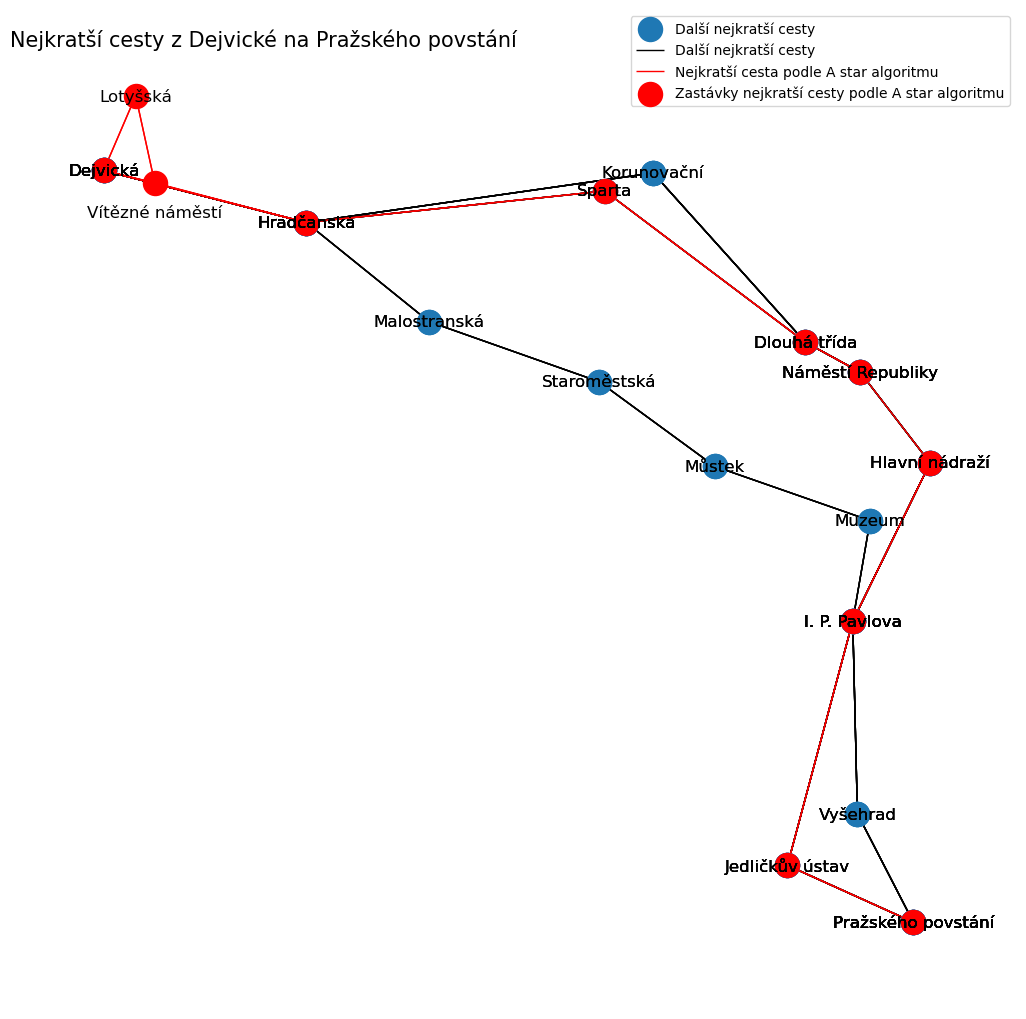

In [13]:
fig = plt.figure(figsize=(10, 10))
count = 0
shortest_paths = list(nx.all_shortest_paths(G, "Dejvická", "Pražského povstání"))
for x in shortest_paths:
    C = G.subgraph(x)
    if count == 0: nx.draw(C, pos=stop_pos, arrows=False, label="Další nejkratší cesty")
    count = 1
    nx.draw_networkx_labels(C, pos=stop_pos)
    nx.draw(C, pos=stop_pos, arrows=False)

shortest_path = list(nx.astar_path(G, "Dejvická", "Pražského povstání"))
shortest_path_edges = [ (node1, node2) for node1, node2 in G.edges() if node1 in shortest_path and node2 in shortest_path ]
C = G.subgraph(shortest_path)
nx.draw_networkx_edges(
    C,
    pos=stop_pos,
    edgelist=shortest_path_edges,
    edge_color="red",
    arrows=False,
    label="Nejkratší cesta podle A star algoritmu"
)
nx.draw_networkx_nodes(
    C,
    pos=stop_pos,
    nodelist=shortest_path,
    node_color="red",
    label="Zastávky nejkratší cesty podle A star algoritmu"
)
nx.draw_networkx_labels(C, pos=my_pos)

plt.legend(loc="best")
plt.suptitle("Nejkratší cesty z Dejvické na Pražského povstání", fontsize=15, ha="right")
plt.show()

### Otázka 2 (3 body): Jaká zastávka má nejvíce směrů kam se odsud jezdí?

* Z takové grafu jsme zjistili 3 místa v Praze, ze kterých vyjíždí dálkové vlaky a víme dokonce, že z Černého mostu se vyjíždí na severovýchod, z Lihovaru na Jih a ze Zličína na západ od Prahy.

Takové zastávky jsou 3:

In [16]:
biggest_degree = [ node for node, node_attr in G.nodes(True) if node_attr["degree_centrality"] == 28 ]
biggest_degree

['Černý Most', 'Lihovar', 'Zličín']

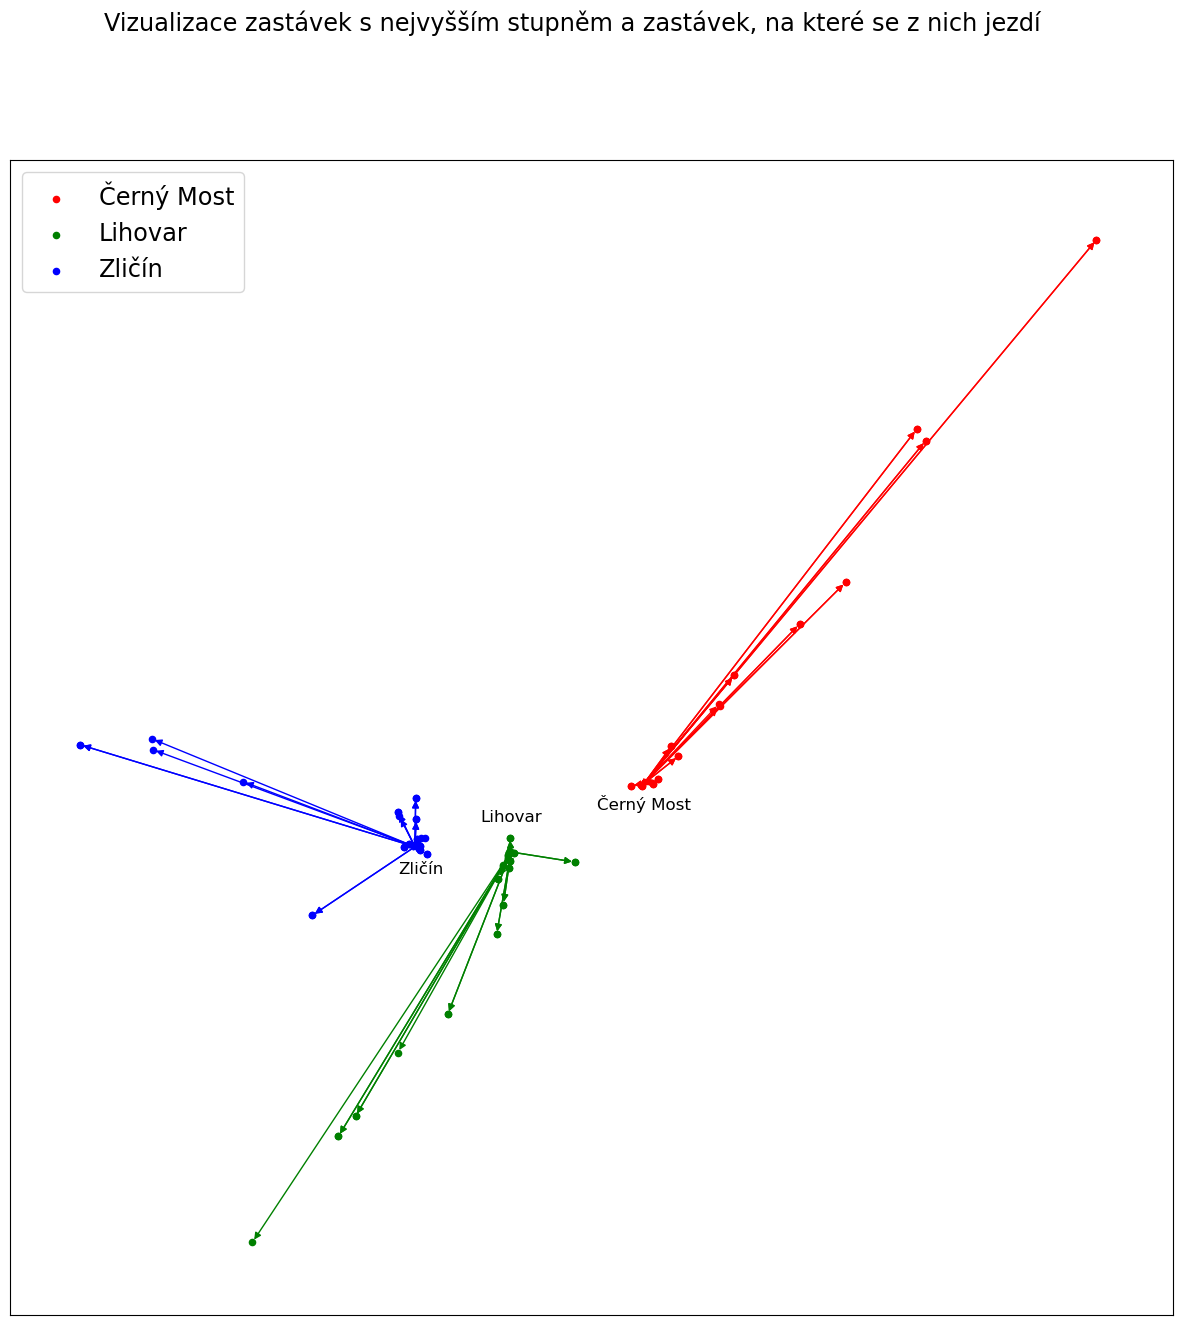

In [17]:
my_pos = {
    'Černý Most': [14.57684, 50.090653], 
    'Lihovar': [14.410835,  50.078653], 
    'Zličín': [14.29806,  50.03324]
}
labels = { node:node for node in biggest_degree }
colors = {
    biggest_degree[0]:"red",
    biggest_degree[1]:"green",
    biggest_degree[2]:"blue",
}
fig = plt.figure(figsize=(15, 15))
for x in biggest_degree:
    nodes = [ node for node in nx.all_neighbors(G, x)]
    edges = [ (x, node) for node in nodes ]
    C = G.subgraph(nodes)
    nx.draw_networkx_nodes(C, pos=stop_pos, nodelist=nodes, node_color=colors[x], node_size=20, label=x)
    nx.draw_networkx_edges(C, pos=stop_pos, edgelist=edges, nodelist=nodes, node_size = 20, label=x, edge_color=colors[x])

nx.draw_networkx_labels(C, my_pos, labels=labels)
plt.legend(loc="upper left", fontsize="xx-large")
plt.suptitle("Vizualizace zastávek s nejvyšším stupněm a zastávek, na které se z nich jezdí", fontsize="xx-large")
plt.show()

### Otázka 3 (3 body): Na jaké trase projede nejvíce dopravních prostředků za jeden týden?

In [18]:
zone_filter = [ node for node, node_attr in G.nodes(True) if node_attr["zone"] == "P" ]
vehicle_filter = [ new_df["stop_from_name"][index] for index in new_df.index if new_df["route_type"][index] == 0 ]
filter = [ node for node in G.nodes if node in zone_filter and node in vehicle_filter ]

In [19]:
weights = [ attr["weight"] for x, y, attr in G.edges(data=True)]
print("weight: min:", min(weights), "max:", max(weights))
print("Nejvíce projetí za týden:", [ (x, y) for x, y, attr in G.edges(data=True) if attr["weight"] > 10500 ])

weight: min: 1 max: 10911
Nejvíce projetí za týden: [('Národní divadlo', 'Národní třída')]


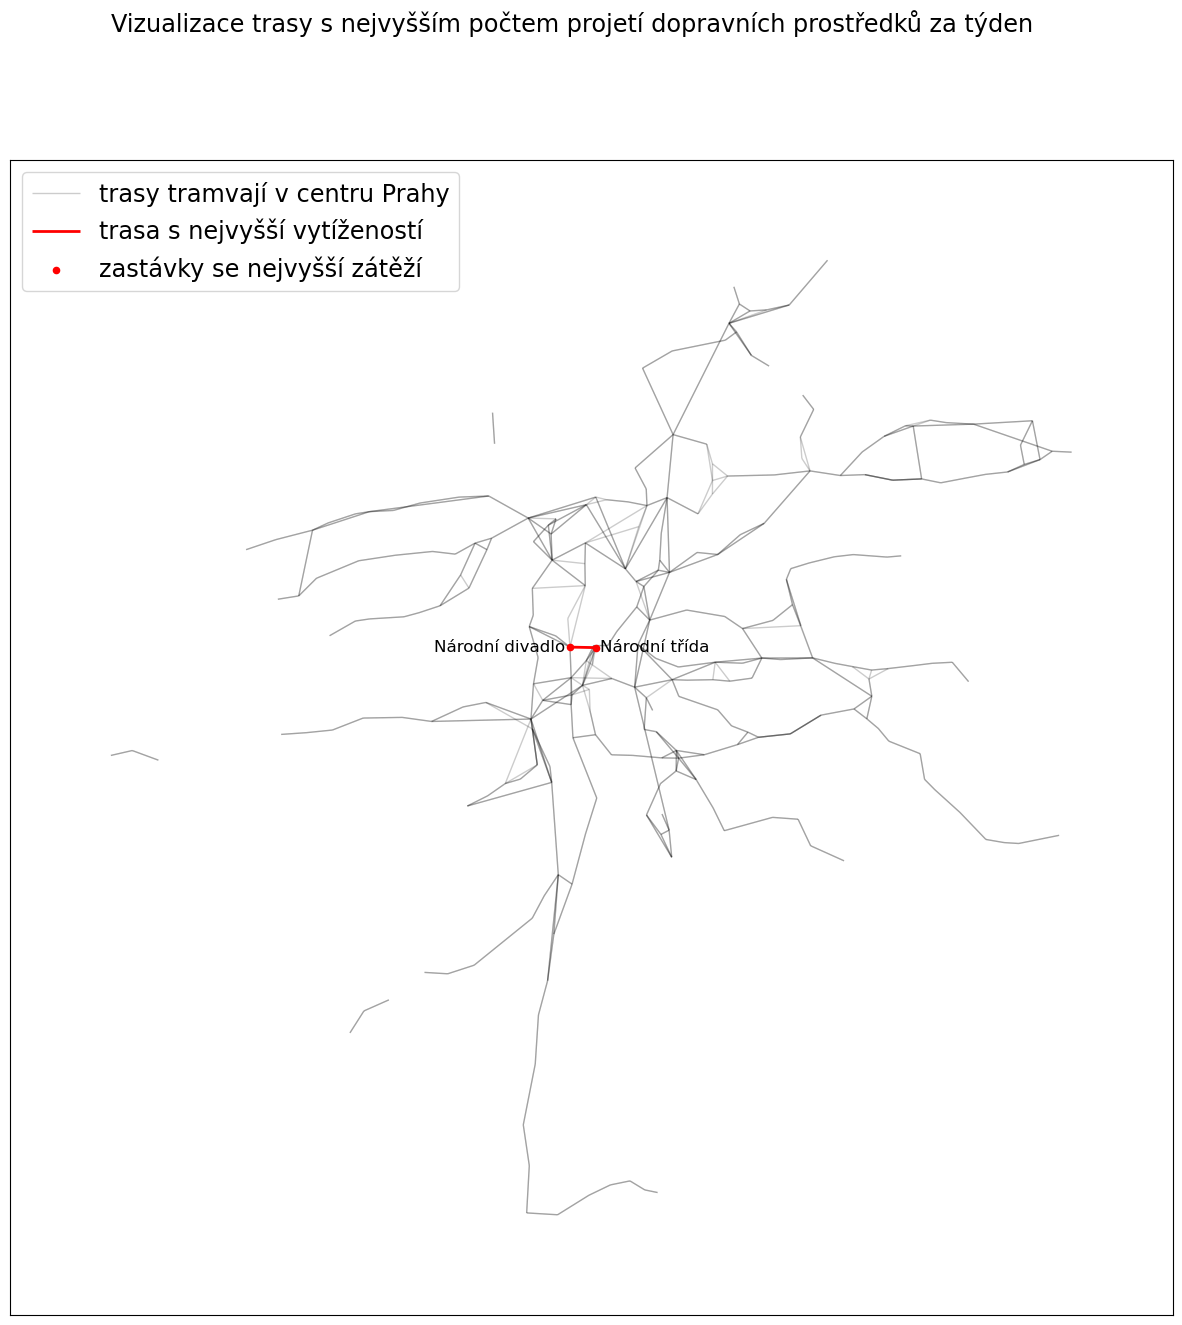

In [20]:
C = G.subgraph(filter)
fig, ax = plt.subplots(figsize=(15, 15))
nx.draw_networkx_edges(
    C,
    pos=stop_pos,
    width=1,
    arrows=False,
    label="trasy tramvají v centru Prahy",
    alpha = 0.2
)
nx.draw_networkx_edges(
    C,
    pos=stop_pos,
    edgelist=[('Národní divadlo', 'Národní třída')],
    width=2,
    arrows=False,
    edge_color="red",
    nodelist = ['Národní divadlo', 'Národní třída'],
    node_size=20,
    label="trasa s nejvyšší vytížeností"
)
nx.draw_networkx_nodes(
    C,
    pos=stop_pos,
    nodelist=['Národní divadlo', 'Národní třída'],
    node_color="red",
    label="zastávky se nejvyšší zátěží",
    node_size=20
)
nx.draw_networkx_labels(C, {'Národní divadlo':[14.395807, 50.079819], 'Národní třída':[14.43535, 50.07975]}, labels={'Národní divadlo':'Národní divadlo', 'Národní třída':'Národní třída'})
plt.legend(loc="upper left", fontsize='xx-large')
fig.suptitle("Vizualizace trasy s nejvyšším počtem projetí dopravních prostředků za týden", fontsize="xx-large")
plt.show()

## Zdroje

* ML1, VIZ,

https://www.ecyklistika.cz/obrazek/3/mapa-prahy-a-stredoceskeho-kraje-orezana-jpg/